In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
np.random.seed(42)
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer
import nltk, string, re, spacy,unicodedata, random
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


CPU times: user 8.7 s, sys: 1.65 s, total: 10.4 s
Wall time: 14.4 s


In [ ]:
import pandas as pd

# Define the corrected file paths
train_file_path = "/content/drive/MyDrive/EACL Dravidian Langtech-2023/Task_01/transliterated_task1.csv"
valid_file_path = "/content/drive/MyDrive/EACL Dravidian Langtech-2023/Task_01/validation_transliterated_task_1.csv"
test_file_path = "/content/drive/MyDrive/EACL Dravidian Langtech-2023/Task_01/test_transliterated.csv"

# Load the CSV files
train_data = pd.read_csv(train_file_path, delimiter=',', header=0)
valid_data = pd.read_csv(valid_file_path, delimiter=',', header=0)
test_data = pd.read_csv(test_file_path, delimiter=',', header=0)

In [ ]:
train_data = train_data[['transliterated_text', 'label']]

In [ ]:
train_data.head()

,transliterated_text,label
0,നല്ല അവതരണം. സത്യം പുറത്തു വരട്ടെ,Fake
1,മാഷ അല്ലാ,Fake
2,"അന്വേഷണം കഴിയുമ്പോൾ,. സി. അ. അ. യ്ക്ക് എതിരായ ...",Fake
3,ഇല്ലതെന്ത അവരു പുറത്ത് വിടയിട്ടല്ലണ്ട് വേറെന്ത്,Fake
4,ബറാന പക്ഷത്തിന് മറ്റൊരു നിയമം.നല്ല മൊയന്ത് മന്...,original


In [ ]:
test_data

,Unnamed: 0,text,cleaned,transliterated_text
0,0,5000 ഉള്ള പോൾ ലോഗ്‌ഡ്‌വൻ ഇപ്പോള് 250000 എന്താ...,5000 ഉള്ള പോൾ ലോഗ്‌ഡ്‌വൻ ഇപ്പോള് 250000 എന്താ...,൫൦൦൦ ഉള്ള പോൾ ലോഗ്‌ഡ്‌വൻ ഇപ്പോള് ൨൫൦൦൦൦ എന്താ...
1,1,ഓഷോ രജനീഷ് പറഞ്ഞപോലെ എനിക്കപ്പോൾ തോന്നിയത് അ...,ഓഷോ രജനീഷ് പറഞ്ഞപോലെ എനിക്കപ്പോൾ തോന്നിയത് അ...,ഓഷോ രജനീഷ് പറഞ്ഞപോലെ എനിക്കപ്പോൾ തോന്നിയത് അ...
2,2,ചേട്ടാ വാർത്ത വയ്ക്കുന്നത് കേരളത്തിലാണ് സം...,ചേട്ടാ വാർത്ത വയ്ക്കുന്നത് കേരളത്തിലാണ് സം...,ചേട്ടാ വാർത്ത വയ്ക്കുന്നത് കേരളത്തിലാണ് സം...
3,3,Shame for entire Woman&#39,shame for entire woman39,ഷെയിം ഫോർ എന്റയർ വുമൻ൩൯
4,4,135 code janaghal andhu wide business cheythal...,135 code janaghal andhu wide business cheythal...,൧൩൫ കോഡ് ജനഘൽ അന്തു വൈഡ് ബിസിനസ് ചെയ്താലും വിജ...
...,...,...,...,...
1014,1014,Correct ...China cheitha ...weapon spread ing ...,correct china cheitha weapon spread ing aanu,കറക്ട് ചിന ചെയ്ത വെപ്പൺ സ്പ്രെഡ് ഇങ്ങ് ആണ്
1015,1015,ഈ WHO പറയുന്നതനുസരിച്ചു ചികിത്സയും ലോക്ക് ഡൌൺ ...,ഈ who പറയുന്നതനുസരിച്ചു ചികിത്സയും ലോക്ക് ഡൌൺ ...,ഈ വോ പറയുന്നതനുസരിച്ചു ചികിത്സയും ലോക്ക് ഡൌൺ മ...
1016,1016,Mask illa aarkum😏😏,mask illa aarkum😏😏,മാസ്ക് ഇല്ല ആർകും😏😏
1017,1017,ഇയാളെ കൊറോണ. രോഗി കൾ കിടയിൽ. ഇടാമായിരുന്നു---!!,ഇയാളെ കൊറോണ രോഗി കൾ കിടയിൽ ഇടാമായിരുന്നു,ഇയാളെ കൊറോണ രോഗി കൾ കിടയിൽ ഇടാമായിരുന്നു


In [ ]:
train_data.shape

(3257, 2)

In [ ]:
train_data.columns

Index(['transliterated_text', 'label'], dtype='object')

In [ ]:
test_data.columns

Index(['Unnamed: 0', 'text', 'cleaned', 'transliterated_text'], dtype='object')

In [ ]:
# Assuming the correct column name is 'Unnamed: 0 ' (with trailing space)
train_data = train_data.drop(columns='Unnamed: 0', errors='ignore')

# Renaming columns
train_data = train_data.rename(columns={'text                ': 'text', 'category': 'label'})
# Stripping whitespaces from column names
valid_data.columns = valid_data.columns.str.strip()

# Dropping the column 'Unnamed: 0' (with possible leading/trailing spaces)
valid_data = valid_data.drop(columns='Unnamed: 0', errors='ignore')

# Renaming columns
valid_data = valid_data.rename(columns={'text                        ': 'text', 'category': 'label'})

test_data = test_data.rename(columns={'text                        ':'text'})

In [ ]:
train_data.head()

,transliterated_text,label
0,നല്ല അവതരണം. സത്യം പുറത്തു വരട്ടെ,Fake
1,മാഷ അല്ലാ,Fake
2,"അന്വേഷണം കഴിയുമ്പോൾ,. സി. അ. അ. യ്ക്ക് എതിരായ ...",Fake
3,ഇല്ലതെന്ത അവരു പുറത്ത് വിടയിട്ടല്ലണ്ട് വേറെന്ത്,Fake
4,ബറാന പക്ഷത്തിന് മറ്റൊരു നിയമം.നല്ല മൊയന്ത് മന്...,original


In [ ]:
test_data.columns

Index(['Unnamed: 0', 'text', 'cleaned', 'transliterated_text'], dtype='object')

In [ ]:
train_data['label'].value_counts()

original    1658
Fake        1599
Name: label, dtype: int64

In [ ]:
train_data.shape

(3257, 2)

In [ ]:
valid_data['label'].value_counts()

original    409
Fake        406
Name: label, dtype: int64

In [ ]:
valid_data.head()

,text,label,validation_label,cleaned,transliterated_text
0,Full. Musilm. Verodamum,Fake,1,full. musilm. verodamum,ഫുൾ. മ്യൂസിൽം. വേരോടമും
1,പക്ഷികളും മൃഗങ്ങളും ഈ ലോകത്ത് സുഖമായി ജീവിക്കു...,Fake,1,പക്ഷികളും മൃഗങ്ങളും ഈ ലോകത്ത് സുഖമായി ജീവിക്കു...,പക്ഷികളും മൃഗങ്ങളും ഈ ലോകത്ത് സുഖമായി ജീവിക്കു...
2,ഒരു താടിക്കാരൻ പാത്രം കൊട്ടാൻ പറഞ്ഞപ്പോ .........,original,0,ഒരു താടിക്കാരൻ പാത്രം കൊട്ടാൻ പറഞ്ഞപ്പോ .........,ഒരു താടിക്കാരൻ പാത്രം കൊട്ടാൻ പറഞ്ഞപ്പോ .........
3,കുംഭളേമ<br>മറന്നോ,original,0,കുംഭളേമമറന്നോ,കുംഭളേമമറന്നോ
4,ഇത് തിരുവാതിര അല്ല...... കോറോണയെ കൈകൊട്ടി കൊല്...,original,0,ഇത് തിരുവാതിര അല്ല...... കോറോണയെ കൈകൊട്ടി കൊല്...,ഇത് തിരുവാതിര അല്ല...... കോറോണയെ കൈകൊട്ടി കൊല്...


In [ ]:
train_data['enc_label'] = train_data['label'].replace({'original':0, 'Fake':1
                                                       })
valid_data['enc_label'] = valid_data['label'].replace({'original':0, 'Fake':1
                                                       })

train_data.head()

,transliterated_text,label,enc_label
0,നല്ല അവതരണം. സത്യം പുറത്തു വരട്ടെ,Fake,1
1,മാഷ അല്ലാ,Fake,1
2,"അന്വേഷണം കഴിയുമ്പോൾ,. സി. അ. അ. യ്ക്ക് എതിരായ ...",Fake,1
3,ഇല്ലതെന്ത അവരു പുറത്ത് വിടയിട്ടല്ലണ്ട് വേറെന്ത്,Fake,1
4,ബറാന പക്ഷത്തിന് മറ്റൊരു നിയമം.നല്ല മൊയന്ത് മന്...,original,0


In [ ]:
print("Size of the training data ==> ", train_data.shape)
print("Size of the validation data ==>", valid_data.shape)
print("Size of the Test data ==>", test_data.shape)

Size of the training data ==>  (3257, 3)
Size of the validation data ==> (815, 6)
Size of the Test data ==> (1019, 4)


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(train_data[['label']]))
encoded_labels .columns = encoder.get_feature_names_out(['label'])
train_data= pd.concat([train_data, encoded_labels ], axis=1)

In [ ]:
train_data.columns

Index(['transliterated_text', 'label', 'enc_label', 'label_Fake',
       'label_original'],
      dtype='object')

In [ ]:
train_data = train_data.rename(columns={'label_original':'original','label_Fake':'Fake'
                                        })
train_data.sample(10)

,transliterated_text,label,enc_label,Fake,original
2829,എന്തുവാ സഖാവേ അമ്മായിക്കും അടുപ്പിലും ആവാം,original,0,0.0,1.0
134,"ഇവന്മാർ ഒരികളും സത്യം പറയില്ല, ലൈവ് റെക്കോർഡ് ...",Fake,1,1.0,0.0
2299,ഇതിലും വെല്യേ ഒരു ട്രോൾ ഉണ്ടോ അവതാരകന് എത്ര ക...,original,0,0.0,1.0
1610,പരനറികൾ.....,original,0,0.0,1.0
990,കഷ്ടം.....,original,0,0.0,1.0
1173,അപ്പോൾ ചിന ഉണ്ടാക്കി വിട്ട വൈറസ് അനോ ഇഇ കൊറോണ,Fake,1,1.0,0.0
1206,അഹ് പോയിട്ടോ,Fake,1,1.0,0.0
1869,ഇത് വെറും സാമ്പിള് വെടി കെട്ടു മാത്രം .,Fake,1,1.0,0.0
2986,പാകിസ്ഥാൻ അൽസോ ക്ലോസ് ഫ്രണ്ട്സ് ഗ്രൂപ്പ് അഫക്ട...,Fake,1,1.0,0.0
2668,സിപിഎം ന്റെ കൂടെ കൂടി വീണക്കും ബുന്ദി പോയി എന്...,original,0,0.0,1.0


In [ ]:
'''
Text Cleaning

'''
def text_cleaning(row):
  # to remove HTML tags
  text = BeautifulSoup(row, 'html.parser').get_text()
  print(text)
  d = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE) #This line is for removing url
  post = d.replace('\n', '')
  post = post.replace('—', ' ')
  # to remove accented characters
  new_text = unicodedata.normalize('NFKD', post).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  # to remove special characters and numbers
  # define the pattern to keep
  #pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]'
  #text = re.sub(pat, '', new_text)
  #to remove punctuation
  text = ''.join([c for c in text if c not in string.punctuation])
  # to remove special characters
  pattern = r'^\s*|\s\s*'
  text = re.sub(pattern, ' ', text).strip()
  # convert into lower case
  # text = text.lower()
  # Stopword Removing
  tokenizer = ToktokTokenizer()
  # convert sentence into token of words
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  text = re.sub(r"[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]+", ' ', text)
  print("---- DONE ----")
  return text

In [ ]:
punctuations = '''’'!()-[]{};:'"\,<>./?@#$%^&*_~�'''

def remove_punctuation_url(d):
    # d=d.lower()
    d = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', d, flags=re.MULTILINE) #This line is for removing url
    review = d.replace('\n', '')
    no_punct = ""
    for char in review:
      if char not in punctuations:
         no_punct = no_punct + char
    return no_punct

def cleantext(string):
    text = string.split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)
    tx = text.replace('&amp',' ')
    #text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    # text = text.split()
    # text = [w for w in text if not w in stops]
    # text = " ".join(text)
    text = re.sub(r"[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]+", ' ', text)

    return text

def clean(text):
  if not isinstance(text, str):
    return ''

  print('Text: ', text)
  text = remove_punctuation_url(text)
  text = cleantext(text)
  print('Output: ', text)
  print(" ")

  if not isinstance(text, str):
    return ''

  return text

In [ ]:
train_data.dropna(how='any', inplace=True)
valid_data.dropna(how='any', inplace=True)

In [ ]:
#removing URLs and Punctuations
#Removing punctuations
train_data['cleaned'] = train_data['transliterated_text'].apply(clean)
valid_data['cleaned'] = valid_data['transliterated_text'].apply(clean)
test_data['cleaned'] = test_data['transliterated_text'].apply(clean)


Streaming output truncated to the last 5000 lines.
Output:  ഇവന്റെ വിചാരം ഇവൻ പറയുന്നത് ലോക നിലവാരത്തിലുള്ള കോമഡി ആണെന്നാണ് മലബാർ ശയിലിയിൽ കുറച്ചു ആൾക്കാരെ ഒക്കെ പരിഹസിച്ചു ന്യൂസ്‌ റൂമിന്റെ ഉള്ളിലിരുന്നു ചിലക്കുന്നത് വലിയ സംഭവമാണെന്ന് വിചാരിക്കുന്നേ
 
Text:  ചൈനയുടെ ശത്രു രാജ്യം തകർക്കുക അത് ആണ് ചൈനയുടെ ലക്ഷ്യം
Output:  ചൈനയുടെ ശത്രു രാജ്യം തകർക്കുക അത് ആണ് ചൈനയുടെ ലക്ഷ്യം
 
Text:  മോഹനൻ വൈദ്യർ ഗ്രേറ്റ് മെഡിസിൻ കൊറോണ ഫൂളിഷ് പ്യൂപ്പിൾ #൩൯;ട് ക്നോ അനിത്തിങ് ബിലീവ്ഡ് ലൈക്ക് ടൈപ്സ് മീഡിയ മെസേജ്
Output:  മോഹനൻ വൈദ്യർ ഗ്രേറ്റ് മെഡിസിൻ കൊറോണ ഫൂളിഷ് പ്യൂപ്പിൾ ൩൯ട് ക്നോ അനിത്തിങ് ബിലീവ്ഡ് ലൈക്ക് ടൈപ്സ് മീഡിയ മെസേജ്
 
Text:  സർ പറഞ്ഞ കാര്യങ്ങളെല്ലാം കുറെ യൊക്കെ ശരിയാണ്. ഇപ്പോഴേ ഇതൊന്നും പറയണ്ടായിരുന്നു. മറ്റുള്ള ഡോക്ടേഴ്സ് ഡിആർ. ഡാനിഷ് സലിം നെ പോലുള്ളവർ ഉറക്കം ഒളിച്ചു പണിത തൊക്കെ വെറുതെ ആകുമോ? സമൂഹ വ്യാപനം ഉണ്ടായാൽ ഈ കാണുന്ന കളിയൊക്കെ മാറും. ൨ മാസം കൂടി നമ്മളൊന്നു സൂക്ഷിക്കുന്നത് നല്ലതാണെന്ന് തോന്നുന്നു.
Output:  സർ പറഞ്ഞ കാര്യങ്ങളെല്ലാം കുറെ യൊക്കെ ശരിയാണ് ഇപ്പോഴേ ഇതൊന്നും പറയണ്ടായിരുന്നു മറ്റു

In [ ]:
train_data.columns

Index(['transliterated_text', 'label', 'enc_label', 'Fake', 'original',
       'cleaned'],
      dtype='object')

In [ ]:
lables= [  'original','Fake']

# Count number of unique words in each set
def dataset_statistics(dataset):
  for l in lables:
    subset = dataset[dataset[l] == 1.0]
    word_list = [word.strip() for text in subset.cleaned for word in text.strip().split()]
    print(f"\nClass Name:--> {l} ")
    print("Number of Words:{}".format(len(word_list)))
    print("Number of Unique Words:{}".format(len(np.unique(word_list))))
    if word_list:
      print("Maximum post length: {}".format(max(dataset[dataset[l]==1.0].cleaned.apply(char_length))))
      print("Average Words in texts: {}".format(np.mean(dataset[dataset[l]==1.0].cleaned.apply(char_length))))
    else:
      print("No posts in this class.")

DATA STATISTICS

In [ ]:
def char_length(row):
    return len(row.split())

In [ ]:
lables = ['original', 'Fake']

# Count number of unique words in each set
def dataset_statistics(dataset):
  for l in lables:
    word_list = [word.strip() for t in list(dataset[dataset[l]==1.0].cleaned) for word in t.strip().split()]
    print(f"\nClass Name:--> {l} ")
    print("Number of Words:{}".format(len(word_list)))
    print("Number of Unique Words:{}".format(len(np.unique(word_list))))
    print("Maximum post length: {}".format(max(dataset[dataset[l]==1.0].cleaned.apply(char_length))))
    print("Average Words in texts: {}".format(np.mean(dataset[dataset[l]==1.0].cleaned.apply(char_length))))

In [ ]:
train_data

,transliterated_text,label,enc_label,Fake,original,cleaned
0,നല്ല അവതരണം. സത്യം പുറത്തു വരട്ടെ,Fake,1,1.0,0.0,നല്ല അവതരണം സത്യം പുറത്തു വരട്ടെ
1,മാഷ അല്ലാ,Fake,1,1.0,0.0,മാഷ അല്ലാ
2,"അന്വേഷണം കഴിയുമ്പോൾ,. സി. അ. അ. യ്ക്ക് എതിരായ ...",Fake,1,1.0,0.0,അന്വേഷണം കഴിയുമ്പോൾ സി അ അ യ്ക്ക് എതിരായ കലാപം...
3,ഇല്ലതെന്ത അവരു പുറത്ത് വിടയിട്ടല്ലണ്ട് വേറെന്ത്,Fake,1,1.0,0.0,ഇല്ലതെന്ത അവരു പുറത്ത് വിടയിട്ടല്ലണ്ട് വേറെന്ത്
4,ബറാന പക്ഷത്തിന് മറ്റൊരു നിയമം.നല്ല മൊയന്ത് മന്...,original,0,0.0,1.0,ബറാന പക്ഷത്തിന് മറ്റൊരു നിയമംനല്ല മൊയന്ത് മന്ത്രി
...,...,...,...,...,...,...
3252,വീണാ ജോർജ് എന്ന ഒരു ആരോഗ്യ മന്ത്രി വന്നതിനു ശേ...,original,0,0.0,1.0,വീണാ ജോർജ് എന്ന ഒരു ആരോഗ്യ മന്ത്രി വന്നതിനു ശേ...
3253,ഇതാണ് പിണുവാതിര,original,0,0.0,1.0,ഇതാണ് പിണുവാതിര
3254,കേസ് എടുക്കണം,original,0,0.0,1.0,കേസ് എടുക്കണം
3255,എല്ലാത്തിനേം ൫൦൧ സോപ്പിട്ട് കളിപ്പിച്ച് വിടണം,original,0,0.0,1.0,എല്ലാത്തിനേം ൫൦൧ സോപ്പിട്ട് കളിപ്പിച്ച് വിടണം


In [ ]:
dataset_statistics(train_data)


Class Name:--> original 
Number of Words:13112
Number of Unique Words:6318
Maximum post length: 157
Average Words in texts: 7.917874396135265

Class Name:--> Fake 
Number of Words:21083
Number of Unique Words:10427
Maximum post length: 325
Average Words in texts: 13.185115697310819


In [ ]:
valid_data

,text,label,validation_label,cleaned,transliterated_text,enc_label
0,Full. Musilm. Verodamum,Fake,1,ഫുൾ മ്യൂസിൽം വേരോടമും,ഫുൾ. മ്യൂസിൽം. വേരോടമും,1
1,പക്ഷികളും മൃഗങ്ങളും ഈ ലോകത്ത് സുഖമായി ജീവിക്കു...,Fake,1,പക്ഷികളും മൃഗങ്ങളും ഈ ലോകത്ത് സുഖമായി ജീവിക്കു...,പക്ഷികളും മൃഗങ്ങളും ഈ ലോകത്ത് സുഖമായി ജീവിക്കു...,1
2,ഒരു താടിക്കാരൻ പാത്രം കൊട്ടാൻ പറഞ്ഞപ്പോ .........,original,0,ഒരു താടിക്കാരൻ പാത്രം കൊട്ടാൻ പറഞ്ഞപ്പോ മറ്റൊര...,ഒരു താടിക്കാരൻ പാത്രം കൊട്ടാൻ പറഞ്ഞപ്പോ .........,0
3,കുംഭളേമ<br>മറന്നോ,original,0,കുംഭളേമമറന്നോ,കുംഭളേമമറന്നോ,0
4,ഇത് തിരുവാതിര അല്ല...... കോറോണയെ കൈകൊട്ടി കൊല്...,original,0,ഇത് തിരുവാതിര അല്ല കോറോണയെ കൈകൊട്ടി കൊല്ലുകയാണ്,ഇത് തിരുവാതിര അല്ല...... കോറോണയെ കൈകൊട്ടി കൊല്...,0
...,...,...,...,...,...,...
810,ജനങ്ങൾ വിഡ്ഢികളല്ല .. അത്രേ പറയാനുള്ളു,original,0,ജനങ്ങൾ വിഡ്ഢികളല്ല അത്രേ പറയാനുള്ളു,ജനങ്ങൾ വിഡ്ഢികളല്ല .. അത്രേ പറയാനുള്ളു,0
811,😂😂ഒരു പിണറായി,original,0,ഒരു പിണറായി,ഒരു പിണറായി,0
812,Mr sir are you know about bodhidarma the great...,Fake,1,എംആർ സിർ ക്നോ ബോധിധർമ ഗ്രേറ്റ് സിന്ധ ഇംഗ്ലീഷ് ...,എംആർ സിർ ക്നോ ബോധിധർമ ഗ്രേറ്റ് സിന്ധ ഇംഗ്ലീഷ് ...,1
813,ബുദ്ധിയുള്ളവരെ വിജയിപ്പിക്,Fake,1,ബുദ്ധിയുള്ളവരെ വിജയിപ്പിക്,ബുദ്ധിയുള്ളവരെ വിജയിപ്പിക്,1


In [ ]:
# Function to calculate dataset statistics
def dataset_statistics(dataset, labels):
    for label in labels:
        word_list = [word.strip() for text in list(dataset[dataset[label]==1.0].cleaned) for word in text.strip().split()]
        print(f"\nClass Name:--> {label} ")
        print("Number of Words: {}".format(len(word_list)))
        print("Number of Unique Words: {}".format(len(np.unique(word_list))))
        print("Maximum post length: {}".format(max(dataset[dataset[label]==1.0].cleaned.apply(char_length))))
        print("Average Words in texts: {}".format(np.mean(dataset[dataset[label]==1.0].cleaned.apply(char_length))))

# Assuming 'valid_data' is your DataFrame and 'labels' is the list of labels
labels = ['validation_label', 'enc_label']
dataset_statistics(valid_data, labels)



Class Name:--> validation_label 
Number of Words: 4885
Number of Unique Words: 3195
Maximum post length: 176
Average Words in texts: 12.032019704433498

Class Name:--> enc_label 
Number of Words: 4885
Number of Unique Words: 3195
Maximum post length: 176
Average Words in texts: 12.032019704433498


In [ ]:
def comments_length_per_class(dataset,set_name):
  label = dataset[['original', 'Fake']]
  label = label.values
  comment = dataset['cleaned']
  comment = comment.values
  y = np.zeros(label.shape)
  for ix in range(comment.shape[0]):
      l = len(comment[ix].split())
      if label[ix][0] :
          y[ix][0] = l
      if label[ix][1] :
          y[ix][1] = l
  #color = ['red','green','blue','yellow','chartreuse']
  labelsplt = ['original', 'Fake']
  color = ['green','red']
  bins = [1,20,40,60,80]
  plt.figure(figsize=(5,3))
  #plt.title ('Tweets Length Distribution Per Class')
  plt.hist(y,bins = bins,label = labelsplt,color = color)
  plt.axis([0, 80, 0, 17000])
  plt.xlabel('Length of texts')
  plt.ylabel('Number of texts')
  plt.legend()
  #plt.savefig(path+'real-fake_no_title.png',dpi = 600,bbox_inches ='tight')
  #plt.grid(True)
  plt.show()

ML

In [ ]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

In [ ]:
## TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
#use_idf=True,tokenizer=lambda x: x.split()
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split())
vectorised_posts = vectorizer.fit_transform(train_data['transliterated_text'])
vectorized_train_posts = vectorizer.transform(train_data['transliterated_text'])
vectorized_valid_posts = vectorizer.transform(valid_data['transliterated_text'])
vectorized_test_posts = vectorizer.transform(test_data['transliterated_text'])

print("Feature Size: ", vectorized_train_posts.shape[1])
#vectorizer.vocabulary_

Feature Size:  16569


In [ ]:
vectorized_valid_posts.shape

(815, 16569)

In [ ]:
valid_data['label'].value_counts()

original    409
Fake        406
Name: label, dtype: int64

In [ ]:
labels = ['original','Fake']
def actual_label(row):
    return labels[row]

LR

In [ ]:
# After Tunning
# Optimum C = 100
lr = LogisticRegression(class_weight='balanced',C =1)
lr.fit(vectorized_train_posts,train_data['enc_label'])
y_pred = lr.predict(vectorized_valid_posts)
print_metrices(y_pred,valid_data['enc_label'])

[[349  60]
 [ 84 322]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       409
           1       0.84      0.79      0.82       406

    accuracy                           0.82       815
   macro avg       0.82      0.82      0.82       815
weighted avg       0.82      0.82      0.82       815

Accuracy :  0.8233128834355828
Precison :  0.8250855642273514
Recall :  0.8233128834355828
F1 :  0.8234854440109799


In [ ]:
test_pred = lr.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run

,id,text,label
0,1,5000 ഉള്ള പോൾ ലോഗ്‌ഡ്‌വൻ ഇപ്പോള് 250000 എന്താ...,Fake
1,2,ഓഷോ രജനീഷ് പറഞ്ഞപോലെ എനിക്കപ്പോൾ തോന്നിയത് അ...,Fake
2,3,ചേട്ടാ വാർത്ത വയ്ക്കുന്നത് കേരളത്തിലാണ് സം...,original
3,4,Shame for entire Woman&#39,original
4,5,135 code janaghal andhu wide business cheythal...,Fake
...,...,...,...
1014,1015,Correct ...China cheitha ...weapon spread ing ...,Fake
1015,1016,ഈ WHO പറയുന്നതനുസരിച്ചു ചികിത്സയും ലോക്ക് ഡൌൺ ...,Fake
1016,1017,Mask illa aarkum😏😏,original
1017,1018,ഇയാളെ കൊറോണ. രോഗി കൾ കിടയിൽ. ഇടാമായിരുന്നു---!!,Fake


In [ ]:
folder_path= "/content/drive/MyDrive/EACL Dravidian Langtech-2023/Task_01"

In [ ]:
run.to_csv(folder_path +'malayalam_lr.tsv',sep = '\t',index = False)

SVM

In [ ]:
## SVM
from sklearn.svm import SVC
svc =  SVC(kernel='linear' ,random_state=1234,class_weight='balanced')
svc.fit(vectorized_train_posts,train_data['enc_label'])
y_pred = svc.predict(vectorized_valid_posts)
print_metrices(y_pred,valid_data['enc_label'])

[[352  57]
 [ 81 325]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       409
           1       0.85      0.80      0.82       406

    accuracy                           0.83       815
   macro avg       0.83      0.83      0.83       815
weighted avg       0.83      0.83      0.83       815

Accuracy :  0.8306748466257668
Precison :  0.8324459313664022
Recall :  0.8306748466257668
F1 :  0.830840217177189


In [ ]:
test_pred = svc.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run

,id,text,label
0,1,5000 ഉള്ള പോൾ ലോഗ്‌ഡ്‌വൻ ഇപ്പോള് 250000 എന്താ...,Fake
1,2,ഓഷോ രജനീഷ് പറഞ്ഞപോലെ എനിക്കപ്പോൾ തോന്നിയത് അ...,Fake
2,3,ചേട്ടാ വാർത്ത വയ്ക്കുന്നത് കേരളത്തിലാണ് സം...,original
3,4,Shame for entire Woman&#39,original
4,5,135 code janaghal andhu wide business cheythal...,original
...,...,...,...
1014,1015,Correct ...China cheitha ...weapon spread ing ...,Fake
1015,1016,ഈ WHO പറയുന്നതനുസരിച്ചു ചികിത്സയും ലോക്ക് ഡൌൺ ...,Fake
1016,1017,Mask illa aarkum😏😏,original
1017,1018,ഇയാളെ കൊറോണ. രോഗി കൾ കിടയിൽ. ഇടാമായിരുന്നു---!!,Fake


In [ ]:
run['label'].value_counts()

original    529
Fake        490
Name: label, dtype: int64

In [ ]:
run.to_csv(folder_path +'malayalam_svm.tsv',sep = '\t',index = False)

Random Forest

In [ ]:
def print_metrics(true, pred):
    print("Confusion Matrix:\n", confusion_matrix(true, pred))
    print("Classification Report:\n", classification_report(true, pred))
    print("Accuracy:", accuracy_score(true, pred))
    print("Precision:", precision_score(true, pred, average='weighted'))
    print("Recall:", recall_score(true, pred, average='weighted'))
    print("F1 Score:", f1_score(true, pred, average='weighted'))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming you have tuned the hyperparameters and found the optimum ones
# For example, let's say you found the optimum number of estimators is 100
optimum_n_estimators = 100

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=optimum_n_estimators, class_weight='balanced', random_state=42)

# Fit the model to the training data
rf.fit(vectorized_train_posts, train_data['enc_label'])

# Make predictions on the validation set
y_pred_rf = rf.predict(vectorized_valid_posts)

# Print metrics
print("Random Forest Metrics:")
print_metrics(y_pred, valid_data['enc_label'])


Random Forest Metrics:
Confusion Matrix:
 [[352  81]
 [ 57 325]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84       433
           1       0.80      0.85      0.82       382

    accuracy                           0.83       815
   macro avg       0.83      0.83      0.83       815
weighted avg       0.83      0.83      0.83       815

Accuracy: 0.8306748466257668
Precision: 0.8324459313664022
Recall: 0.8306748466257668
F1 Score: 0.830840217177189


ENSEMBLE APPROACH (MAJORIRITY VOTING)

In [ ]:
#LogReg_clf = LogisticRegression(class_weight='balanced')
#DTree_clf = DecisionTreeClassifier(class_weight='balanced')
#rt_clf =   RandomForestClassifier(class_weight='balanced')
#SVC_clf = SVC(C = 5,class_weight='balanced')


#voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf),('RF', rt_clf)], voting='hard')
#voting_clf.fit(vectorized_train_posts, train_data['enc_label'])
#preds = voting_clf.predict(vectorized_valid_posts)
#print_metrices(valid_data['enc_label'], preds)


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create individual classifiers
lr = LogisticRegression(class_weight='balanced', C=1)
svm = SVC(kernel='linear', class_weight='balanced', C=1)
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Create an ensemble model using majority voting
ensemble_model = VotingClassifier(estimators=[
    ('Logistic Regression', lr),
    ('Support Vector Machine', svm),
    ('Random Forest', rf)
], voting='hard')

# Fit the ensemble model to the training data
ensemble_model.fit(vectorized_train_posts, train_data['enc_label'])

# Make predictions on the validation set
y_pred_ensemble = ensemble_model.predict(vectorized_valid_posts)

# Print metrics
print("Ensemble Metrics:")
print("Accuracy:", accuracy_score(valid_data['enc_label'], y_pred_ensemble))
print_metrics(y_pred, valid_data['enc_label'])



Ensemble Metrics:
Accuracy: 0.8220858895705522
Confusion Matrix:
 [[352  81]
 [ 57 325]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84       433
           1       0.80      0.85      0.82       382

    accuracy                           0.83       815
   macro avg       0.83      0.83      0.83       815
weighted avg       0.83      0.83      0.83       815

Accuracy: 0.8306748466257668
Precision: 0.8324459313664022
Recall: 0.8306748466257668
F1 Score: 0.830840217177189


In [ ]:
test_pred = voting_clf.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run

,id,text,label
0,1,5000 ഉള്ള പോൾ ലോഗ്‌ഡ്‌വൻ ഇപ്പോള് 250000 എന്താ...,original
1,2,ഓഷോ രജനീഷ് പറഞ്ഞപോലെ എനിക്കപ്പോൾ തോന്നിയത് അ...,Fake
2,3,ചേട്ടാ വാർത്ത വയ്ക്കുന്നത് കേരളത്തിലാണ് സം...,original
3,4,Shame for entire Woman&#39,original
4,5,135 code janaghal andhu wide business cheythal...,Fake
...,...,...,...
1014,1015,Correct ...China cheitha ...weapon spread ing ...,Fake
1015,1016,ഈ WHO പറയുന്നതനുസരിച്ചു ചികിത്സയും ലോക്ക് ഡൌൺ ...,Fake
1016,1017,Mask illa aarkum😏😏,original
1017,1018,ഇയാളെ കൊറോണ. രോഗി കൾ കിടയിൽ. ഇടാമായിരുന്നു---!!,Fake


In [ ]:
run.to_csv(folder_path +'malayalam_voting.tsv',sep = '\t',index = False)

DL MODELS

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
print("Tensorflow Version:--",tf.version.VERSION)


Tensorflow Version:-- 2.15.0


In [ ]:
tokenizer = Tokenizer(num_words = 10000,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n-',
                      split=' ', char_level=False, oov_token='', document_count=0)
tokenizer.fit_on_texts(train_data['transliterated_text'])
vocab_size = len(tokenizer.word_index)+1

In [ ]:
print(vocab_size)

14907


In [ ]:
max_len = 100
# Training Sequences
train_sequences = tokenizer.texts_to_sequences(train_data['transliterated_text'])
print(len(tokenizer.word_index))
train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Training Sequences :" ,train_pad_sequences.shape)

# Validation Sequences
validation_sequences = tokenizer.texts_to_sequences(valid_data['transliterated_text'])
validation_pad_sequences =  keras.preprocessing.sequence.pad_sequences(validation_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Validation Sequences :" ,validation_pad_sequences.shape)

14906
Number of Training Sequences : (3255, 100)
Number of Validation Sequences : (815, 100)


In [ ]:
test_sequences = tokenizer.texts_to_sequences(test_data['transliterated_text'])
test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Test Sequences :" ,test_pad_sequences.shape)

Number of Test Sequences : (1019, 100)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight="balanced",
                                    classes=np.unique(train_data['enc_label']),
                                    y=train_data['enc_label'])
weight = {i : class_weights[i] for i in range(2)}

In [ ]:
weight

{0: 0.9827898550724637, 1: 1.0178236397748592}

In [ ]:
num_classes = 2

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = folder_path+"ml_BiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(10000, 100, input_length = max_len),
#tf.keras.layers.Conv1D(128, 5, activation='relu'),
#tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(units = 32,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(3 , activation='sigmoid')])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 bidirectional (Bidirection  (None, 100, 64)           34048     
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 3)                 19203     
                                                                 
Total params: 1053251 (4.02 MB)
Trainable params: 1053251 (4.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(train_pad_sequences,
    train_data['enc_label'],
    epochs=15,
    batch_size = 32,
    validation_split = 0.2,
    verbose =1,
    callbacks = callback_list,
    class_weight = weight)

Epoch 1/15
82/82 [==============================] - ETA: 0s - loss: 0.6745 - accuracy: 0.5972
Epoch 1: val_accuracy improved from -inf to 0.73118, saving model to /content/drive/MyDrive/EACL Dravidian Langtech-2023/Task_01ml_BiLSTMModel.h5
82/82 [==============================] - 19s 166ms/step - loss: 0.6745 - accuracy: 0.5972 - val_loss: 0.5320 - val_accuracy: 0.7312
Epoch 2/15
82/82 [==============================] - ETA: 0s - loss: 0.2214 - accuracy: 0.9075
Epoch 2: val_accuracy improved from 0.73118 to 0.80184, saving model to /content/drive/MyDrive/EACL Dravidian Langtech-2023/Task_01ml_BiLSTMModel.h5
82/82 [==============================] - 11s 131ms/step - loss: 0.2214 - accuracy: 0.9075 - val_loss: 0.4460 - val_accuracy: 0.8018
Epoch 3/15
82/82 [==============================] - ETA: 0s - loss: 0.0725 - accuracy: 0.9754
Epoch 3: val_accuracy did not improve from 0.80184
82/82 [==============================] - 10s 121ms/step - loss: 0.0725 - accuracy: 0.9754 - val_loss: 1.0644

In [ ]:
# Load the saved model
model = load_model(folder_path+'ml_BiLSTMModel.h5')
# prediction
y_pred = np.argmax(model.predict(validation_pad_sequences), axis=-1)
print_metrices(valid_data['enc_label'],y_pred)


26/26 [==============================] - 1s 19ms/step
[[363  81]
 [ 46 325]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       444
           1       0.80      0.88      0.84       371

    accuracy                           0.84       815
   macro avg       0.84      0.85      0.84       815
weighted avg       0.85      0.84      0.84       815

Accuracy :  0.8441717791411043
Precison :  0.8466816104216266
Recall :  0.8441717791411043
F1 :  0.8438590792692878


In [ ]:
test_pred = np.argmax(model.predict(test_pad_sequences), axis=-1).tolist()
test_pred


32/32 [==============================] - 1s 19ms/step


[0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,


In [ ]:
test_data['id'] = test_data.index + 1
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run

,id,text,label
0,1,5000 ഉള്ള പോൾ ലോഗ്‌ഡ്‌വൻ ഇപ്പോള് 250000 എന്താ...,original
1,2,ഓഷോ രജനീഷ് പറഞ്ഞപോലെ എനിക്കപ്പോൾ തോന്നിയത് അ...,Fake
2,3,ചേട്ടാ വാർത്ത വയ്ക്കുന്നത് കേരളത്തിലാണ് സം...,original
3,4,Shame for entire Woman&#39,original
4,5,135 code janaghal andhu wide business cheythal...,original
...,...,...,...
1014,1015,Correct ...China cheitha ...weapon spread ing ...,Fake
1015,1016,ഈ WHO പറയുന്നതനുസരിച്ചു ചികിത്സയും ലോക്ക് ഡൌൺ ...,Fake
1016,1017,Mask illa aarkum😏😏,original
1017,1018,ഇയാളെ കൊറോണ. രോഗി കൾ കിടയിൽ. ഇടാമായിരുന്നു---!!,original


In [ ]:
run.to_csv(folder_path +'malayalam_cnn+bilstm.tsv',sep = '\t',index = False)

Pretrained word embedding fast text


In [ ]:
from urllib.request import urlopen
import gzip

# get the vectors
file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ml.300.vec.gz'))


In [ ]:
tokenizer = Tokenizer(num_words = 30000,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n-',
                      split=' ', char_level=False, oov_token='', document_count=0)
tokenizer.fit_on_texts(train_data['transliterated_text'])
word_index = tokenizer.word_index
vocab_size = len(word_index )+1

In [ ]:
vocab_and_vectors = {}
# put words as dict indexes and vectors as words values
for line in file:
  values = line.split()
  word = values [0].decode('utf-8')
  vector = np.asarray(values[1:], dtype='float32')
  vocab_and_vectors[word] = vector

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in word_index.items():
  embedding_vector = vocab_and_vectors.get(word)
  # words that cannot be found will be set to 0
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
max_len = 100
# Training Sequences
train_sequences = tokenizer.texts_to_sequences(train_data['transliterated_text'])
print(len(tokenizer.word_index))
train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Training Sequences :" ,train_pad_sequences.shape)

# Validation Sequences
validation_sequences = tokenizer.texts_to_sequences(valid_data['transliterated_text'])
validation_pad_sequences =  keras.preprocessing.sequence.pad_sequences(validation_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Validation Sequences :" ,validation_pad_sequences.shape)

14906
Number of Training Sequences : (3255, 100)
Number of Validation Sequences : (815, 100)


In [ ]:
# Test Sequences
test_sequences = tokenizer.texts_to_sequences(test_data['transliterated_text'])
test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Test Sequences :" ,test_pad_sequences.shape)

Number of Test Sequences : (1019, 100)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight="balanced",
                                    classes=np.unique(train_data['enc_label']),
                                    y=train_data['enc_label'])
weight = {i : class_weights[i] for i in range(2)}

In [ ]:
num_classes = 2

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = folder_path+"prt_BiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300,weights=[embedding_matrix],trainable=False, input_length = max_len),
tf.keras.layers.Conv1D(128, 5, activation='relu'),
tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(units = 128,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(3 , activation='sigmoid')])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 300)          4472100   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           192128    
                                                                 
 max_pooling1d (MaxPooling1  (None, 19, 128)           0         
 D)                                                              
                                                                 
 bidirectional_1 (Bidirecti  (None, 19, 256)           263168    
 onal)                                                           
                                                                 
 flatten_1 (Flatten)         (None, 4864)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(train_pad_sequences,
    train_data['enc_label'],
    epochs=25,
    batch_size = 32,
    validation_split = 0.2,
    verbose =1,
    callbacks = callback_list,
    class_weight = weight)


Epoch 1/25
82/82 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5929
Epoch 1: val_accuracy improved from -inf to 0.70814, saving model to /content/drive/MyDrive/EACL Dravidian Langtech-2023/Task_01prt_BiLSTMModel.h5
82/82 [==============================] - 23s 190ms/step - loss: 0.6932 - accuracy: 0.5929 - val_loss: 0.5492 - val_accuracy: 0.7081
Epoch 2/25
82/82 [==============================] - ETA: 0s - loss: 0.4253 - accuracy: 0.8111
Epoch 2: val_accuracy improved from 0.70814 to 0.76805, saving model to /content/drive/MyDrive/EACL Dravidian Langtech-2023/Task_01prt_BiLSTMModel.h5
82/82 [==============================] - 14s 173ms/step - loss: 0.4253 - accuracy: 0.8111 - val_loss: 0.4748 - val_accuracy: 0.7680
Epoch 3/25
82/82 [==============================] - ETA: 0s - loss: 0.2844 - accuracy: 0.8886
Epoch 3: val_accuracy improved from 0.76805 to 0.78495, saving model to /content/drive/MyDrive/EACL Dravidian Langtech-2023/Task_01prt_BiLSTMModel.h5
82/82 [

In [ ]:
# Load the saved model
model = load_model(folder_path+'prt_BiLSTMModel.h5')
# prediction
y_pred = np.argmax(model.predict(validation_pad_sequences), axis=-1)
print_metrices(valid_data['enc_label'],y_pred)


26/26 [==============================] - 3s 68ms/step
[[350  96]
 [ 59 310]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       446
           1       0.76      0.84      0.80       369

    accuracy                           0.81       815
   macro avg       0.81      0.81      0.81       815
weighted avg       0.81      0.81      0.81       815

Accuracy :  0.8098159509202454
Precison :  0.8123290017185848
Recall :  0.8098159509202454
F1 :  0.8093911670792524


In [ ]:
test_pred = np.argmax(model.predict(test_pad_sequences), axis=-1).tolist()
test_pred

32/32 [==============================] - 1s 41ms/step


[0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,


In [ ]:
test_data['id'] = test_data.index + 1
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run


,id,text,label
0,1,5000 ഉള്ള പോൾ ലോഗ്‌ഡ്‌വൻ ഇപ്പോള് 250000 എന്താ...,0
1,2,ഓഷോ രജനീഷ് പറഞ്ഞപോലെ എനിക്കപ്പോൾ തോന്നിയത് അ...,1
2,3,ചേട്ടാ വാർത്ത വയ്ക്കുന്നത് കേരളത്തിലാണ് സം...,0
3,4,Shame for entire Woman&#39,1
4,5,135 code janaghal andhu wide business cheythal...,0
...,...,...,...
1014,1015,Correct ...China cheitha ...weapon spread ing ...,1
1015,1016,ഈ WHO പറയുന്നതനുസരിച്ചു ചികിത്സയും ലോക്ക് ഡൌൺ ...,1
1016,1017,Mask illa aarkum😏😏,0
1017,1018,ഇയാളെ കൊറോണ. രോഗി കൾ കിടയിൽ. ഇടാമായിരുന്നു---!!,0


In [ ]:
run.to_csv(folder_path +'malayalam_cnn+bilstm+fasttext.tsv',sep = '\t',index = False)

Attention

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Concatenate, Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Flatten
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Convolution1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Add, BatchNormalization, Activation, Dropout

In [ ]:
MAX_FEATURES = 10000
EMBED_SIZE = 128
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(train_data['cleaned'])
list_tokenized_train = tokenizer.texts_to_sequences(train_data['cleaned'])
list_tokenized_val = tokenizer.texts_to_sequences(valid_data['cleaned'])
list_tokenized_test = tokenizer.texts_to_sequences(test_data['cleaned'])
RNN_CELL_SIZE = 100

MAX_LEN = 200
X_train = pad_sequences(list_tokenized_train, maxlen=MAX_LEN)
y_train = train_data['enc_label']
X_val = pad_sequences(list_tokenized_val, maxlen=MAX_LEN)
y_val = valid_data['enc_label']
X_test = pad_sequences(list_tokenized_test, maxlen=MAX_LEN)

In [ ]:
class Attention(tf.keras.Model):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # we are doing this to perform addition to calculate the score
        hidden_with_time_axis = tf.expand_dims(hidden, 1)

        # score shape == (batch_size, max_length, 1)
        # we get 1 at the last axis because we are applying score to self.V
        # the shape of the tensor before applying self.V is (batch_size, max_length, units)
        score = tf.nn.tanh(
            self.W1(features) + self.W2(hidden_with_time_axis))
        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(self.V(score), axis=1)

        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

In [ ]:
sequence_input = Input(shape=(MAX_LEN,), dtype="int32")
embedded_sequences = Embedding(MAX_FEATURES, EMBED_SIZE)(sequence_input)


In [ ]:
#conv = Convolution1D(128,5,activation='relu')(embedded_sequences)
#pol = GlobalMaxPool1D()(conv)

lstm = Bidirectional(LSTM(64, return_sequences = True), name="bi_lstm_0")(embedded_sequences)

# Getting our LSTM outputs
(lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(64, return_sequences=True, return_state=True), name="bi_lstm_1")(lstm)


In [ ]:
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])
context_vector, attention_weights = Attention(20)(lstm, state_h)
dense1 = Dense(20, activation="relu")(context_vector)
dropout = Dropout(0.1)(dense1)
output = Dense(6, activation="sigmoid")(dropout)

model = keras.Model(inputs=sequence_input, outputs=output)

In [ ]:

# summarize layers
print(model.summary())


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200)]                0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 200, 128)             1280000   ['input_1[0][0]']             
                                                                                                  
 bi_lstm_0 (Bidirectional)   (None, 200, 128)             98816     ['embedding_1[0][0]']         
                                                                                                  
 bi_lstm_1 (Bidirectional)   [(None, 200, 128),           98816     ['bi_lstm_0[0][0]']           
                              (None, 64),                                                     

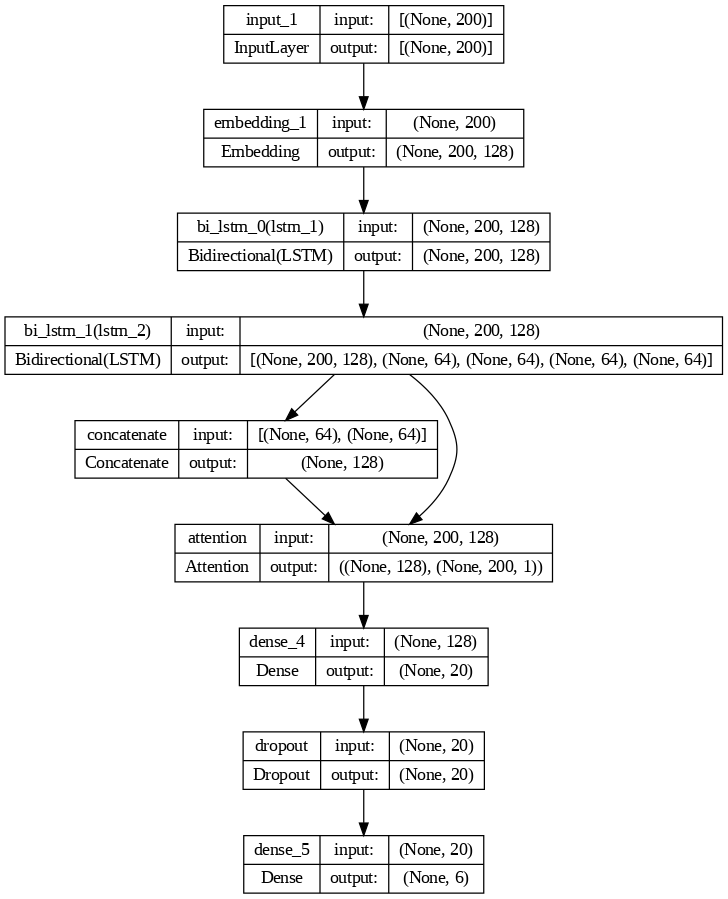

In [ ]:
keras.utils.plot_model(model, show_shapes=True, dpi=90)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])



In [ ]:
BATCH_SIZE = 64
EPOCHS = 4
history = model.fit(X_train,y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.10)

Epoch 1/4
46/46 [==============================] - 64s 1s/step - loss: 0.9762 - accuracy: 0.4612 - val_loss: 0.7070 - val_accuracy: 0.4908
Epoch 2/4
46/46 [==============================] - 59s 1s/step - loss: 0.7540 - accuracy: 0.5104 - val_loss: 0.7135 - val_accuracy: 0.4908
Epoch 3/4
46/46 [==============================] - 51s 1s/step - loss: 0.7416 - accuracy: 0.5097 - val_loss: 0.7074 - val_accuracy: 0.4908
Epoch 4/4
46/46 [==============================] - 52s 1s/step - loss: 0.7349 - accuracy: 0.4985 - val_loss: 0.6910 - val_accuracy: 0.5092


In [ ]:
prediction = np.argmax(model.predict(X_val),axis = -1)
print_metrices(valid_data['enc_label'],prediction)

26/26 [==============================] - 15s 250ms/step
[[  0   0]
 [409 406]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67       815

    accuracy                           0.50       815
   macro avg       0.50      0.25      0.33       815
weighted avg       1.00      0.50      0.67       815

Accuracy :  0.498159509202454
Precison :  0.24816289660882987
Recall :  0.498159509202454
F1 :  0.33129035337624296


In [ ]:
test_pred = np.argmax(model.predict(X_test), axis=-1).tolist()
test_data['id'] = test_data.index + 1
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run

32/32 [==============================] - 9s 271ms/step


,id,text,label
0,1,5000 ഉള്ള പോൾ ലോഗ്‌ഡ്‌വൻ ഇപ്പോള് 250000 എന്താ...,Fake
1,2,ഓഷോ രജനീഷ് പറഞ്ഞപോലെ എനിക്കപ്പോൾ തോന്നിയത് അ...,Fake
2,3,ചേട്ടാ വാർത്ത വയ്ക്കുന്നത് കേരളത്തിലാണ് സം...,Fake
3,4,Shame for entire Woman&#39,Fake
4,5,135 code janaghal andhu wide business cheythal...,Fake
...,...,...,...
1014,1015,Correct ...China cheitha ...weapon spread ing ...,Fake
1015,1016,ഈ WHO പറയുന്നതനുസരിച്ചു ചികിത്സയും ലോക്ക് ഡൌൺ ...,Fake
1016,1017,Mask illa aarkum😏😏,Fake
1017,1018,ഇയാളെ കൊറോണ. രോഗി കൾ കിടയിൽ. ഇടാമായിരുന്നു---!!,Fake
